In [1]:
from qa_qc_lib.qa_qc_gis_copy import QA_QC_GIS_second, QA_QC_GIS_first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import plotly.express as px
import lasio

In [2]:
kern = pd.read_excel('qa_qc_lib/data/Керн1.xlsx')
depth = kern['Глубина отбора образца после привязки к ГИС, м'].to_numpy()
poro = kern['Открытая пористость по воде, Кп, %'].to_numpy()
lithology = kern['Литологическое описание'].to_numpy()
poroeff = kern['Эффективная пористость, Кп эф, %'].to_numpy()
perm = kern['Газопроницаемость параллельно напластованию, Кпр, мД'].to_numpy()
las_path = 'qa_qc_lib/data/9281PL.las'

In [3]:
kern = pd.read_excel('../qaqcgis/data/PoroOK(B).xlsx')
depth = kern['MD'].to_numpy()
poro = kern['Por'].to_numpy()
las_path = '../qaqcgis/data/59P.las'

Тестирование качества увязки литологии по ГИС и по керну

Данные каротажи не были распознаны  ['GZ3R', 'LLD', 'PZ']
Процент совпавших литотипов по ГИС и по керну равен  13.333 %
Желтыми точками отмечены глубины, в которых литология не увязана.


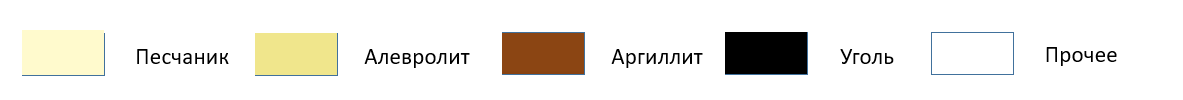

In [4]:
kern = pd.read_excel('../qaqcgis/data/59PLithSat (1).xlsx')
md = [kern.loc[i]['Top'] + kern.loc[i]['H(m)'] for i in kern.index if (type(kern.loc[i]['Top']) != str and type(kern.loc[i]['H(m)']) != str and not np.isnan(kern.loc[i]['Top'] + kern.loc[i]['H(m)']))]
depth = np.array(md)
lithology = kern['Lith'].dropna().to_numpy()
las_path = '../qaqcgis/data/59P.las'
qaqcc = QA_QC_GIS_second(las_path, (2840, 2940), lithology=lithology, depth=depth)
list_of_tests = qaqcc.get_list_of_tests()
qaqcc.test_lithology(kern_arg=5, kern_silt=6, kern_sand=7, kern_coal=8, gis_type='sp')
qaqcc.generate_test_result()

Тестирование качества увязки РИГИС пористости, эффективной пористости и проницаемости с этими же свойствами по керну 

Porosity Fail

Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']


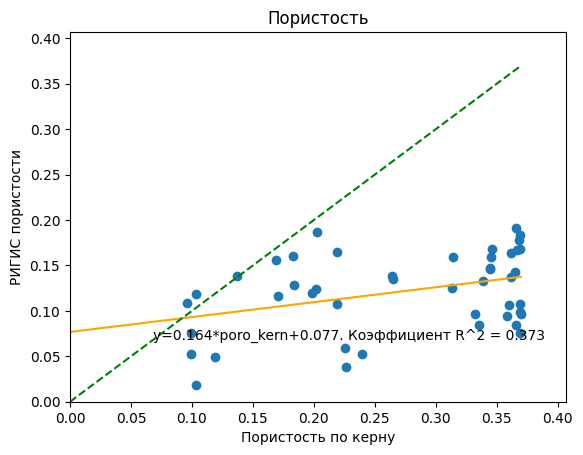

In [5]:
kern = pd.read_excel('../qaqcgis/data/PoroFail(L).xlsx')
depth = kern['MD'].to_numpy()
poro = kern['Porosity (open)'].dropna().to_numpy()
las_path = '../qaqcgis/data/59P.las'
qaqcc = QA_QC_GIS_second(las_path, (depth[0]-10, depth[-1]+10), poro_open=poro, depth=depth)
list_of_tests = qaqcc.get_list_of_tests()
def poro_model(x):
    return 0.0003+0.6852*(1-(x-457.001)/(563-457.001))-0.3095*(1-(x-457.001)/(563-457.001))**2
qaqcc.test_porosity(gis_type1='sp', poro_model=poro_model)

Porosity OK

Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']


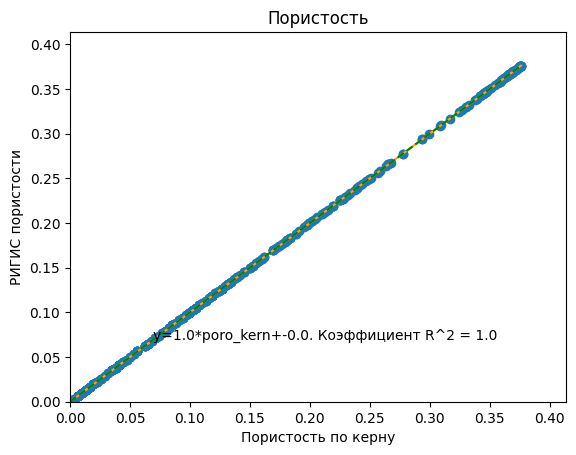

In [6]:
kern = pd.read_excel('../qaqcgis/data/PoroOK(B).xlsx')
depth = kern['MD'].to_numpy()
poro = kern['Por'].to_numpy()
las_path = '../qaqcgis/data/59P.las'
qaqcc = QA_QC_GIS_second(las_path, (depth[0]-10, depth[-1]+10), poro_open=poro, depth=depth)
list_of_tests = qaqcc.get_list_of_tests()
def poro_model(x):
    return 0.0003+0.6852*(1-(x-457.001)/(563-457.001))-0.3095*(1-(x-457.001)/(563-457.001))**2
qaqcc.test_porosity(gis_type1='sp', poro_model=poro_model)

Permeability Fail

Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']


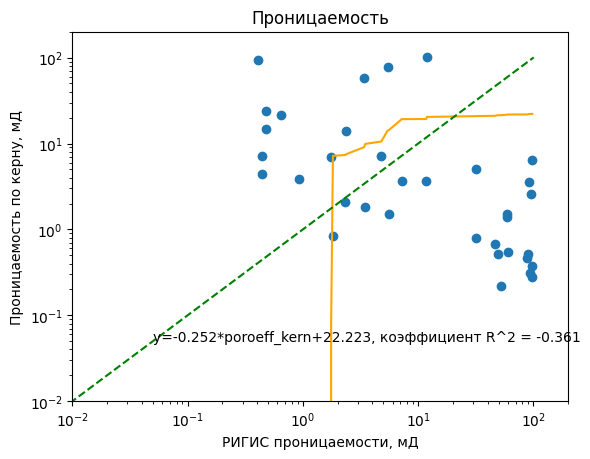

In [7]:
kern = pd.read_excel('../qaqcgis/data/PermFail(Q) (1).xlsx')
depth = kern['MD'].to_numpy()
perm = kern['Permeability, mkm2 (parallel)'].dropna().to_numpy()
las_path = '../qaqcgis/data/59P.las'
qaqcc = QA_QC_GIS_second(las_path, (2840, 2940), poro_open=poro, perm=perm, depth=depth)
list_of_tests = qaqcc.get_list_of_tests()
def poro_model(x):
    return 0.0003+0.6852*(1-(x-457.001)/(563-457.001))-0.3095*(1-(x-457.001)/(563-457.001))**2
def perm_model(x):
    return 0.06*np.exp(20*x)
qaqcc.test_permeability(gis_type1='sp', poro_model=poro_model, perm_model=perm_model, poro_perm_type='poro')

Permeability OK

Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']


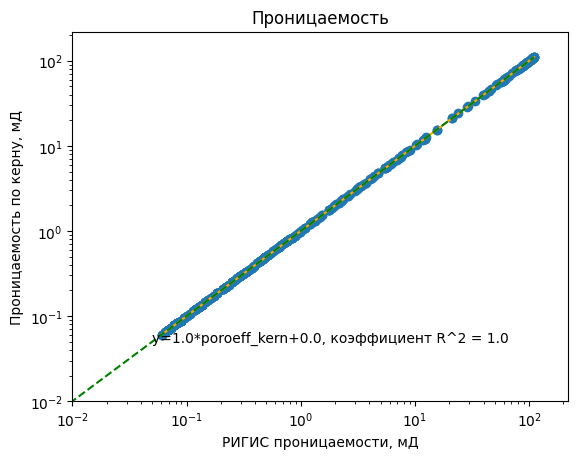

In [10]:
kern = pd.read_excel('../qaqcgis/data/PermOK(B) (1).xlsx')
depth = kern['MD'].to_numpy()
perm = kern['Perm'].to_numpy()
las_path = '../qaqcgis/data/59P.las'
qaqcc = QA_QC_GIS_second(las_path, (2840, 2940), poro_open=poro, perm=perm, depth=depth)
list_of_tests = qaqcc.get_list_of_tests()
def poro_model(x):
    return 0.0003+0.6852*(1-(x-457.001)/(563-457.001))-0.3095*(1-(x-457.001)/(563-457.001))**2
def perm_model(x):
    return 0.06*np.exp(20*x)
qaqcc.test_permeability(gis_type1='sp', poro_model=poro_model, perm_model=perm_model, poro_perm_type='poro')

PorosityEff OK

Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']


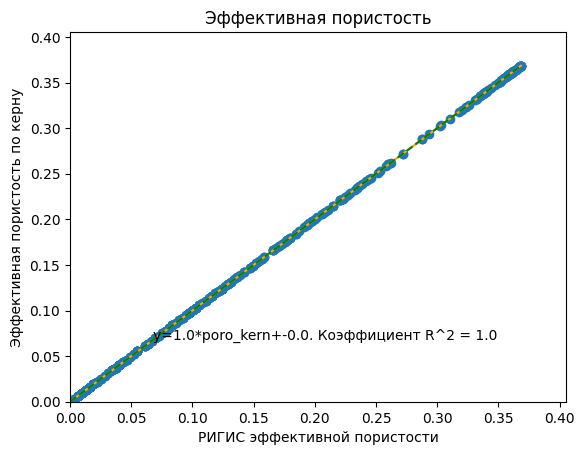

In [11]:
kern = pd.read_excel('../qaqcgis/data/PoroEffOK(B).xlsx')
depth = kern['MD'].to_numpy()
poro_eff = kern['PorEf'].to_numpy()
las_path = '../qaqcgis/data/59P.las'
qaqcc = QA_QC_GIS_second(las_path, (2840, 2940), poro_open=poro, perm=perm, poro_eff=poro_eff, depth=depth)
list_of_tests = qaqcc.get_list_of_tests()
def poro_model(x):
    return 0.0003+0.6852*(1-(x-457.001)/(563-457.001))-0.3095*(1-(x-457.001)/(563-457.001))**2
def perm_model(x):
    return 0.06*np.exp(20*x)
def poroeff_model(x):
    return 0.98*x
qaqcc.test_porosityeff(gis_type1='sp', poro_model=poro_model, perm_model=perm_model, poroeff_model=poroeff_model, poro_perm_type='poro')

PorosityEff Fail

Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']


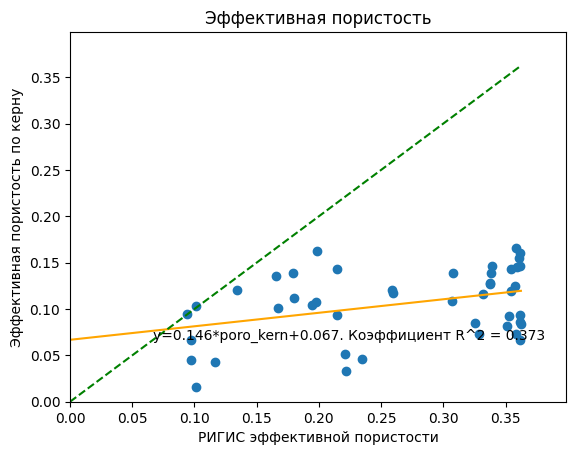

In [20]:
kern = pd.read_excel('../qaqcgis/data/PoroEffFail(N) (1).xlsx')
depth = kern['MD'].to_numpy()
poro_eff = kern['Porosity (effective)'].dropna().to_numpy()
las_path = '../qaqcgis/data/59P.las'
qaqcc = QA_QC_GIS_second(las_path, (2840, 2940), poro_open=poro, perm=perm, poro_eff=poro_eff, depth=depth)
list_of_tests = qaqcc.get_list_of_tests()
def poro_model(x):
    return 0.0003+0.6852*(1-(x-457.001)/(563-457.001))-0.3095*(1-(x-457.001)/(563-457.001))**2
def perm_model(x):
    return 0.06*np.exp(20*x)
def poroeff_model(x):
    return 0.98*x
qaqcc.test_porosityeff(gis_type1='sp', poro_model=poro_model, perm_model=perm_model, poroeff_model=poroeff_model, poro_perm_type='poro')

Тестирование соответсвия модели водонасыщенности по Арчи и по J-функции

Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']


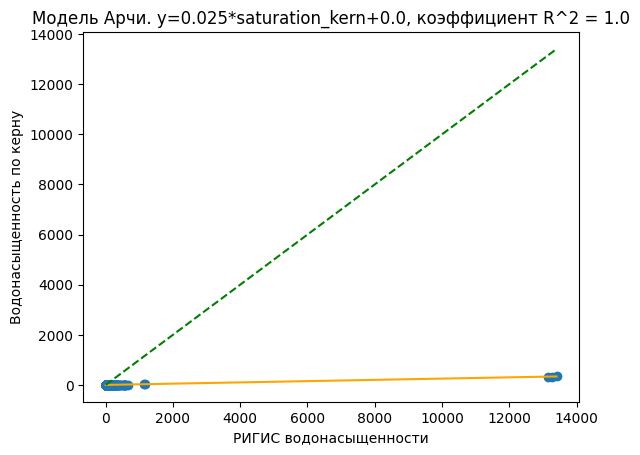

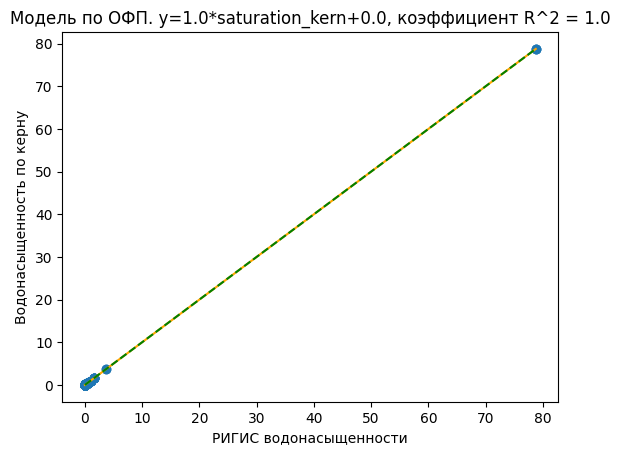

In [21]:
kern = pd.read_excel('../qaqcgis/data/SwFail(BCD) (3).xlsx')
depth = kern['MD'].to_numpy()
Archi_kern = kern['SwA'].to_numpy()
J_kern = kern['SwJ'].to_numpy()
ofp_kern = kern['SwO'].to_numpy()
las_path = '../qaqcgis/data/59P.las'
qaqcc = QA_QC_GIS_second(las_path, (2840, 2940), poro_open = poro, depth=depth)
list_of_tests = qaqcc.get_list_of_tests()
def poro_model(x):
    return 0.0003+0.6852*(1-(x-457.001)/(563-457.001))-0.3095*(1-(x-457.001)/(563-457.001))**2
def Archi_model(x, poro):
    return (110.07/((1000/x)*poro**2))**0.5
def ofp_model(x):
    return 0.0034*x**(-1.239)
qaqcc.test_saturation(gis_type1='sp', poro_model=poro_model, Archi_model = Archi_model, ofp_model=ofp_model, gis_type='ild', Archi_kern=Archi_kern, ofp_kern=ofp_kern, J_kern=J_kern,)

Тестирование наличия записи ГИС в интервале пласта

Не получается открыть las с пропусками

In [22]:
lasio.read('../qaqcgis/data/59GISOtsutstvie.las')

ValueError: Cannot reshape ~A data size (6856,) into 18 columns

Тестирование на наличие интервалов перекрытия для основной и повторной записи ГИС

In [5]:
las_path = '../qaqcgis/data/59PDoubleGIS (1).las'
qaqcc = QA_QC_GIS_second(las_path, (2840, 2940))
qaqcc.test_repeat()

Данные каротажи не были распознаны  ['GZ3R', 'LLD', 'PZ']
Перекрытие интервалов есть в каротажах: 
nktd
gz


: 

Тестирование на наличие несоответствий отметок пластопересечений и глубинного диапазона ГИС

Max_value Fail

In [24]:
las_path = '../qaqcgis/data/59p.las'
qaqcc = QA_QC_GIS_second(las_path, (2840, 2950), poro_open=poro, perm=perm, poro_eff=poro_eff, depth=depth)
qaqcc.test_max_value_gis()


Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']
Максимальная глубина по отбивке 2950, максимальная глубина по ГИС 2930.0. Тест не пройден


Max_value OK

In [25]:
las_path = '../qaqcgis/data/59p.las'
qaqcc = QA_QC_GIS_second(las_path, (2860, 2890), poro_open=poro, perm=perm, poro_eff=poro_eff, depth=depth)
qaqcc.test_max_value_gis()

Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']
Максимальная глубина по отбивке 2890, максимальная глубина по ГИС 2930.0. Тест пройден


Тестирование на соответствие размерностей глубин в ГИС и в файле с отметками пластопересечений

Unit m

In [10]:
las_path = '../qaqcgis/data/59P_OK_m.las'
qaqcc = QA_QC_GIS_second(las_path, (2860, 2890))
qaqcc.test_units(depth_unit='m')

Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']
В ГИС глубина измеряется в M, в файле с отбивками глубина измеряется в m


In [6]:
las_path = '../qaqcgis/data/59P_OK_ft.las'
qaqcc = QA_QC_GIS_second(las_path, (2860, 2890))
qaqcc.test_units(depth_unit='ft')

Данные каротажи не были распознаны  ['GZ1', 'GZ2', 'GZ3', 'GZ3R', 'GZ4', 'LLD', 'PZ']
В ГИС и в файле с отбивками глубина измеряется в футах


In [34]:
las_path = '../qaqcgis/data/59LasCleaned.las'
qaqc = QA_QC_GIS_first(las_path = las_path)

: 

In [31]:
list_of_tests = qaqc.get_list_of_tests()
qaqc.start_tests(list_of_tests)
qaqc.generate_test_report()